In [1]:
URL_DATASET = "https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv"

In [2]:
  import pandas as pd
  import matplotlib.pyplot as plt


  df = pd.read_csv(URL_DATASET)
  df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
495,05-SEP-1939,Vickers Valentia,K2345,RAF,0,Catterick RAF St...,U.K.,A1,1939
496,05-SEP-1939,Junkers Ju-52/3m,WL-AGZG,German AF,9,Wilhelmshaven-Reede,Germany,C1,1939
497,10-SEP-1939,Short Sunderland I,N6135,RAF,0,Pembroke Dock RA...,U.K.,A1,1939
498,13-SEP-1939,Junkers Ju-52/3m,2D+PH,German AF,NaN,near Zinnitz,Germany,A1,1939


In quale nazione si sono verificati più incidenti?

In [3]:

#sostiruisco i valori insoliti con un unica stringa comune
df['country'] = df['country'].replace("", "Unknown country")
# calcolo la moda per risalire alla nazione con più incidenti
country_mode = df['country'].mode()
country_mode = country_mode[0]
print("Maximum country accident: " + country_mode)


Maximum country accident: USA


Cleaning della colonna fatalities

In [4]:

# Funzione per valutare le operazioni
def eval_operation(val):
    try:
        return eval(val)  # Esegue la somma o restituisce il numero pochè noto che il alcune celle sono presenti operazioni
    except:
        return val  # Restituisce il valore originale in caso di errore

# Creazione di una nuova colonna con i valori calcolati
df['fatalities_sum'] = df['fatalities'].apply(eval_operation)
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year,fatalities_sum
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown,NaN
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown,NaN
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown,NaN
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown,NaN
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...
495,05-SEP-1939,Vickers Valentia,K2345,RAF,0,Catterick RAF St...,U.K.,A1,1939,0.0
496,05-SEP-1939,Junkers Ju-52/3m,WL-AGZG,German AF,9,Wilhelmshaven-Reede,Germany,C1,1939,9.0
497,10-SEP-1939,Short Sunderland I,N6135,RAF,0,Pembroke Dock RA...,U.K.,A1,1939,0.0
498,13-SEP-1939,Junkers Ju-52/3m,2D+PH,German AF,NaN,near Zinnitz,Germany,A1,1939,NaN


Clealing della colonna date con date_clean e acquisisco l'anno dalla colonna year per recuperare qualche data

In [ ]:
df['date_clean'] = df['date'].str[:-4] + df['year'].astype(str)
df['date_clean'] = pd.to_datetime(df['date'], errors='coerce')
df['date_clean'] = df['date_clean'].dt.strftime('%d/%m/%Y')

df.head(500)

Aggiungo una colonna con il giorno della settimana estratto dalla colonna data_clean

In [42]:

df['date_clean'] = pd.to_datetime(df['date_clean'], errors='coerce')

# Estrazione del giorno della settimana
df['day_name'] = df['date_clean'].dt.day_name()  # Nome del giorno (es. 'Saturday')

In [43]:
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year,fatalities_sum,date_clean,day_name,fatalities_group_by
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919,14.0,1919-02-08,Saturday,14.0
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,1.0,1919-11-08,Saturday,1.0
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,0.0,NaT,NaN,14.0
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,0.0,NaT,NaN,4.0
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,0.0,NaT,NaN,4.0


Gli incidenti avvengono più di frequente durante determinati giorni della settimana?


In [44]:
#dopo un analisi noto che il 10/05/1940 è frutto in una ripetiziono molto strana, probabilmente un errata catalogazione
day_escluso = "'10/05/1940"

# Filtrare le righe che non corrispondono al giorno escluso
filtered_df = df[df['date_clean'] != day_escluso]

# Calcolare la moda sui valori filtrati
freq_d_acc = filtered_df['day_name'].mode()

freq_d_acc = freq_d_acc[0]
print("Gli incidenti avvengono più di frequente di " + str(freq_d_acc))


Gli incidenti avvengono più di frequente di Sunday


Qual'è il vettore con meno vittime e meno incidenti?

In [79]:


# min operator fatalities
fat_min = df['fatalities_sum'].idxmin()

# min fatalities_sum &  operator
df['fatalities_group_by_oper'] = df.groupby('operator')['fatalities_sum'].transform('sum')
fat_min_values = df.loc[fat_min, 'fatalities_group_by_oper']
# Calcolo del conteggio per ogni valore ripetuto nella colonna 'Categoria'
df['accidents_grou_by_oper'] = df.groupby('operator')['operator'].transform('count')
operator_acc_min = df.loc[fat_min, 'accidents_grou_by_oper']

# min accident operator

#min_operator = freq_op.idxmin()
#min_operator_freq = freq_op.min()

print(f"Il vettore con meno vittime e meno incidenti è {operator_fat_min} con {fat_min_values} vittime e {operator_acc_min} incidenti")



Il vettore con meno vittime e meno incidenti è Handley Page Transport con 4.0 vittime e 7.0 incidenti


Quale tipo di velivolo ha causato più morti?

In [80]:
# columns sum fatalities
df['fatalities_group_by'] = df.groupby('type')['fatalities_sum'].transform('sum')
# max type fatalities
fat_max = df['fatalities_sum'].idxmax()
# max fatalities_sum &  type
v_max_fat_sum = df.loc[fat_max, 'fatalities_sum']
type_fat_max = df.loc[fat_max, 'type']

print(f"Il modello {type_fat_max} ha causato {v_max_fat_sum} vittime")



Il modello Boeing 767-223ER ha causato 1692.0 vittime


Quale categoria di incidente è la più frequente?

In [66]:
#moda categoria incidente più frequente
cat_freq_max = df['cat'].mode()
cat_freq_max = cat_freq_max[0]
print(f"La categoria di incidente più frequente è: {cat_freq_max}")






La categoria di incidente più frequente è: A1


Analisi sicurezza operatori

In [102]:
operatori = df['operator'].value_counts()

# Filtrare le compagnie con almeno 100 voli sul dataset
df_filtrato = df.groupby(['operator']).filter(lambda x: len(x) >= 100)

# Contare il numero di incidenti con zero morti nella  colonna 'fatalities_sum'
zeri_per_operator = df_filtrato[df_filtrato['fatalities_sum'] == 0].groupby('operator').size()

# Trovare il gruppo con il maggior numero di zeri
oper_max_zeri = zeri_per_operator.idxmax()
numero_massimo_zeri = zeri_per_operator.max()
print(f"L'operatore con il maggior numero di incidenti a 0 vittime è {oper_max_zeri} con {numero_massimo_zeri} eventi")
zeri_per_operator.sort_values(ascending=False)


L'operatore con il maggior numero di incidenti a 0 vittime è RAF con 377 eventi


,0
operator,
RAF,377
USAF,336
USAAF,202
private,198
US Navy,148
Aeroflot,105
Unknown,93
American Airlines,84
Eastern Air Lines,79


Come è variato il tasso di mortalità dopo l'11 Settembre?

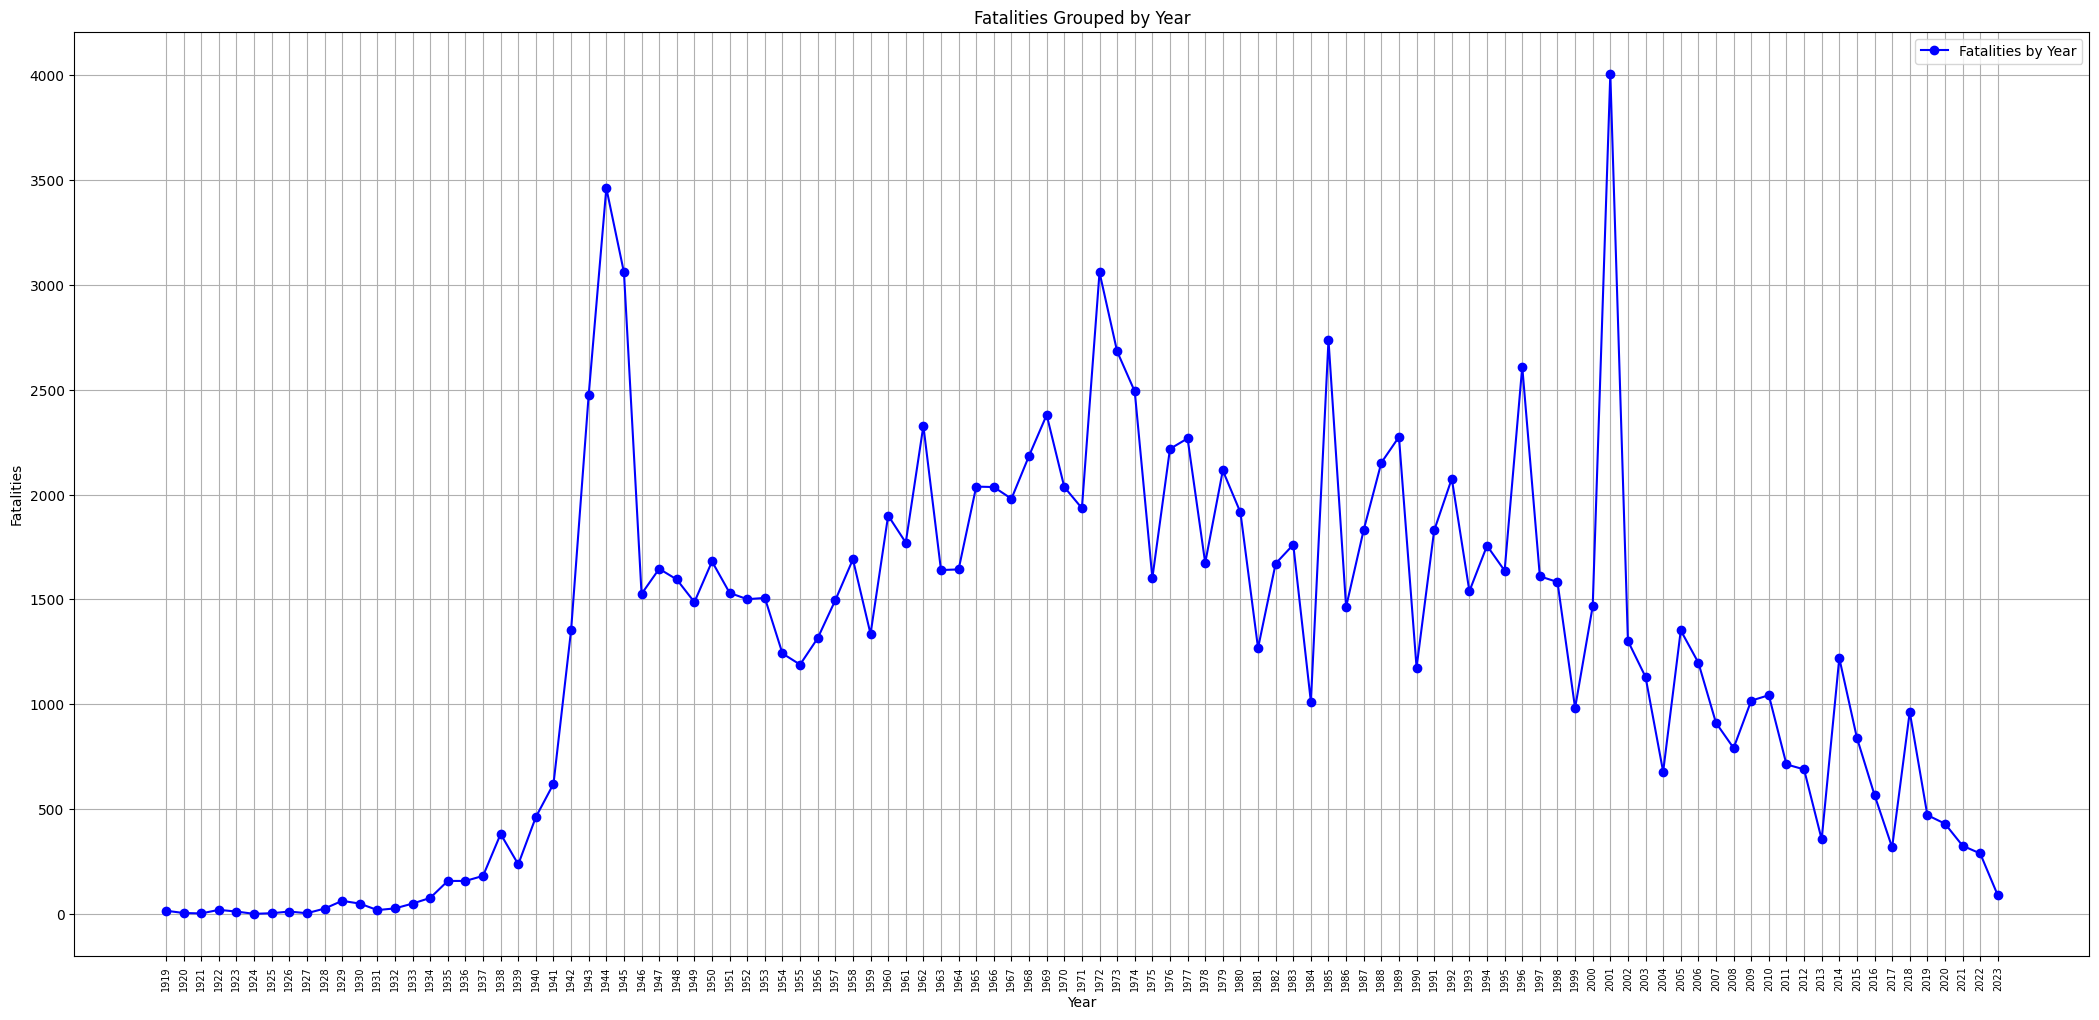

In [77]:
#Calcolare morti per anno e metterli a confronto
df['fatalities_group_by_year'] = df.groupby('year')['fatalities_sum'].transform('sum')

distinct_data = df.drop_duplicates(subset=['year', 'fatalities_group_by_year'])

# Preparare i dati per il grafico
x = distinct_data['year']
y = distinct_data['fatalities_group_by_year']

# Creare il grafico
plt.figure(figsize=(26, 12))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Fatalities by Year')
plt.title('Fatalities Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(sorted(x.unique()), rotation=90, fontsize=7)  # Mi assicuro che i valori sull'asse X siano ordinati
plt.legend()
plt.grid()
plt.show()


Grafico per n. di incidenti per nazione

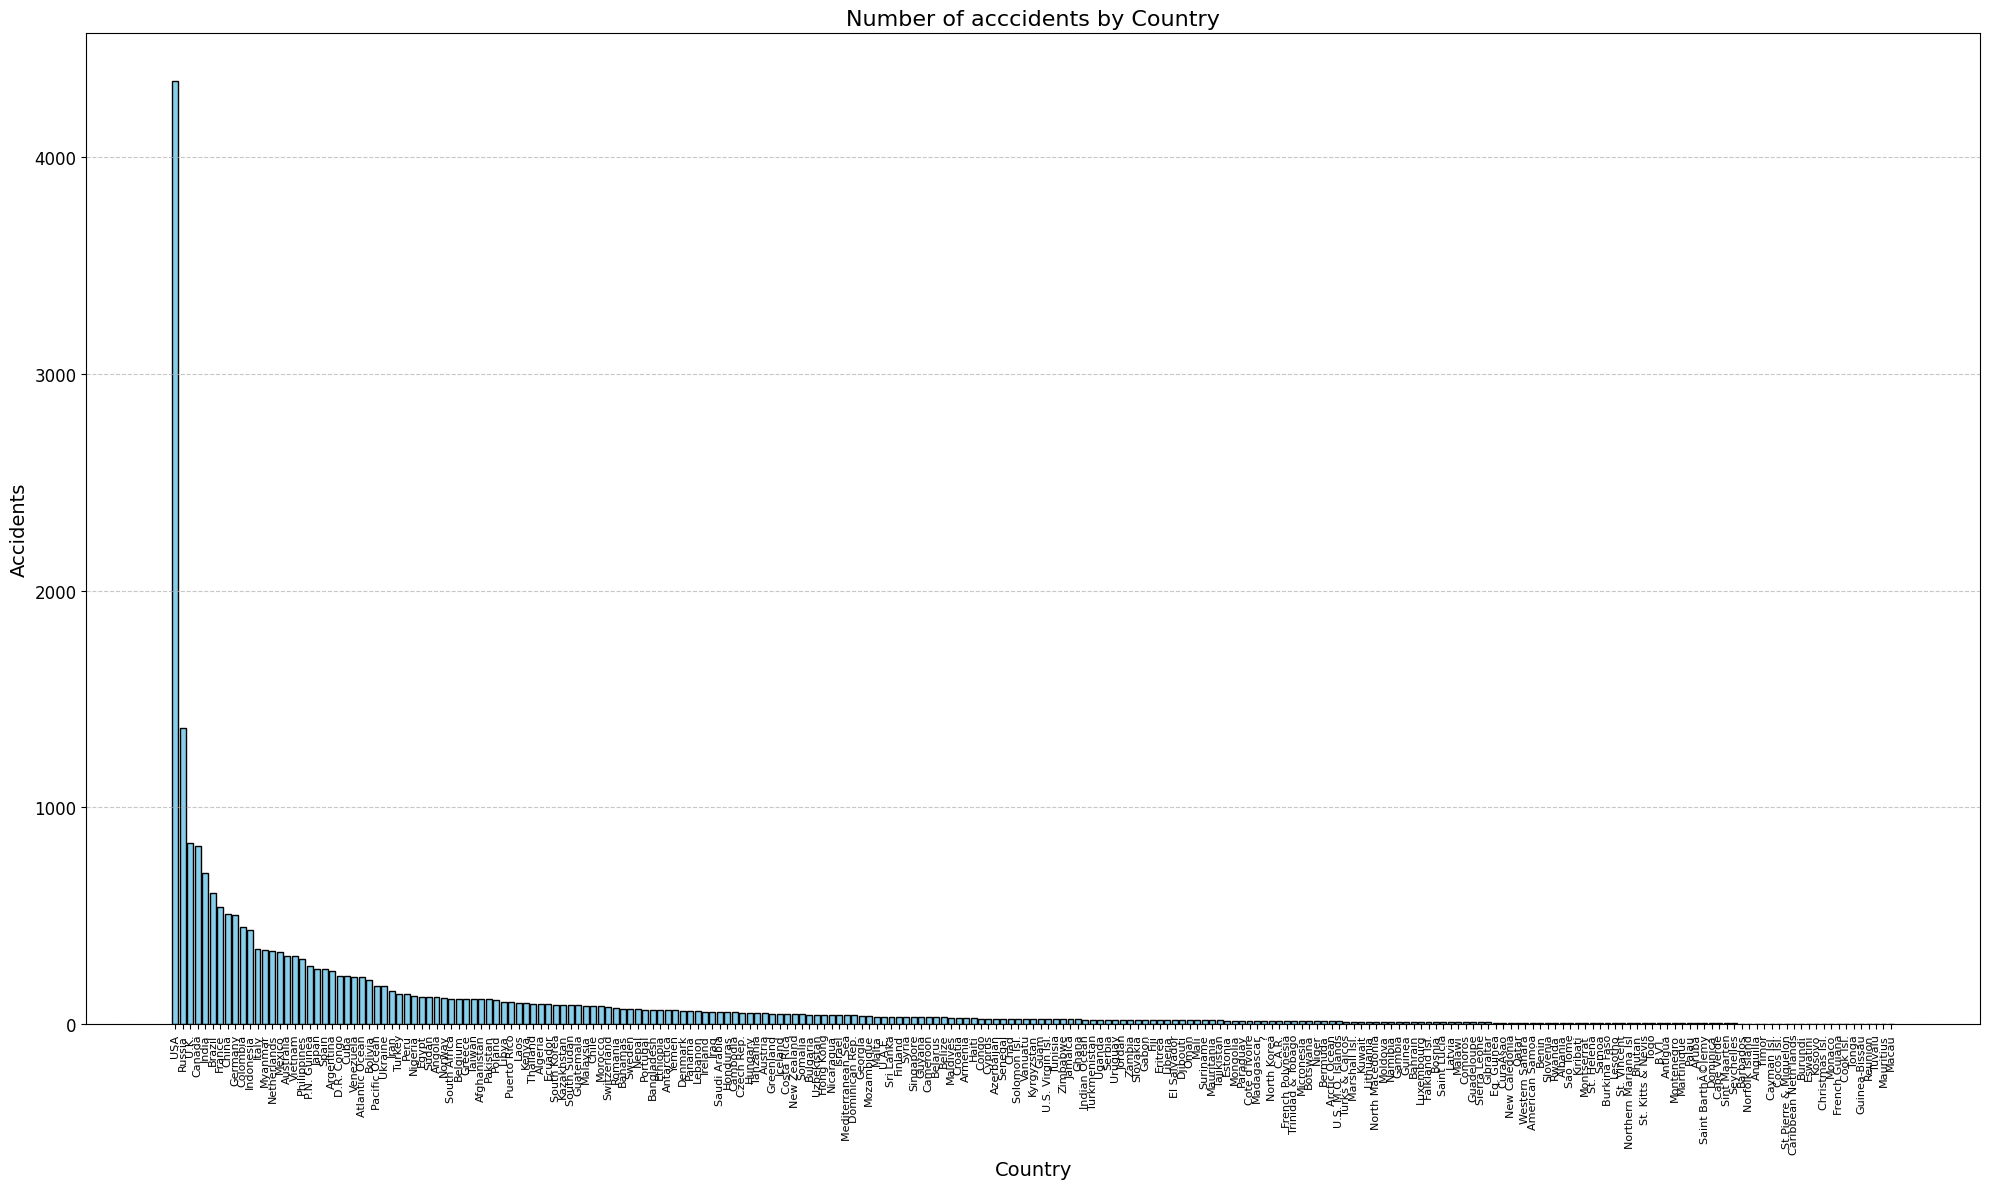

In [ ]:

# escludo le uknown country
df = df[df['country'] != 'Unknown country']
# Calcolo gli incidenti per ciascuna nazione
country_counts = df['country'].value_counts()

# Creo il grafico
plt.figure(figsize=(20, 12))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of acccidents by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Accidents', fontsize=14)
plt.xticks(ticks=range(len(country_counts)), labels=country_counts.index, rotation=90, fontsize=7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostro il grafico
# le nazioni sono tante quindi sull'asse x sono molto ravvicinate
plt.show()


Grafico per numero di incidenti pre&post 11 Settembre

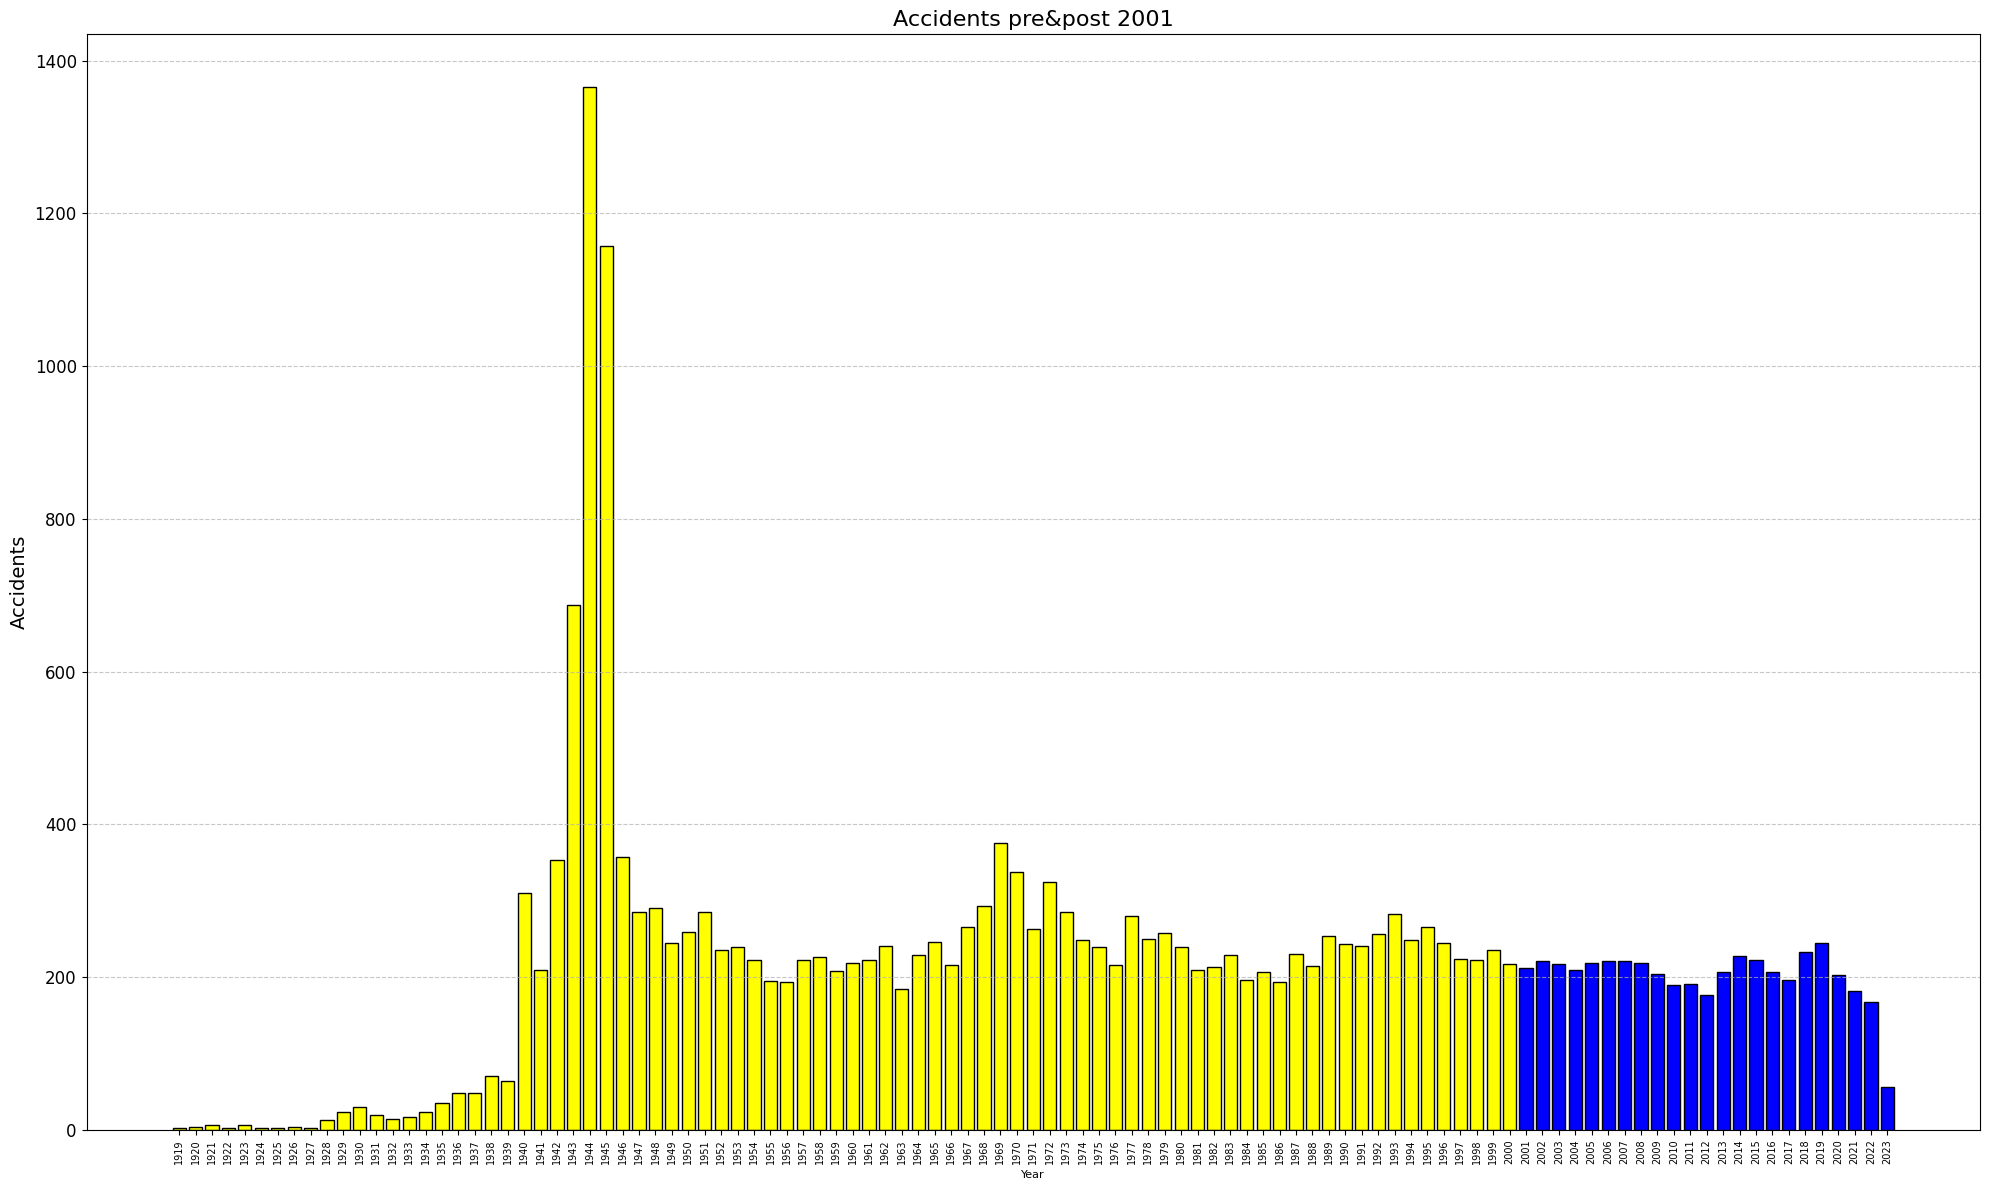

In [ ]:
# Creazione di un grafico per le date raggruppate per anno con distinzione
# tramite colore per gli eventi pre e post 2001


# Escludere valori non numerici o non validi per escludere le uknown
filtered_df = df[df['year'].astype(int).notnull()]
year_counts = filtered_df['year'].value_counts().sort_index()



plt.figure(figsize=(20, 12))
colors = ['yellow' if int(year) < 2001 else 'blue' for year in year_counts.index]
plt.bar(year_counts.index, year_counts.values, color = colors, edgecolor='black')
plt.title('Accidents pre&post 2001', fontsize=16)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Accidents', fontsize=14)
plt.xticks(year_counts.index,rotation=90, fontsize=7)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Mostrare il secondo grafico
plt.show()
